In [7]:
# mounting g-drive into this notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# importing a few important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# reading the dataset into a pandas dataframe

sup = pd.read_csv('/content/drive/MyDrive/Great Learning/Datasets/Suppy_Chain_Capstone.csv')
sup.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
# showing all the variables without hiding any one of them

pd.set_option('display.max_columns', None)
sup.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


# Basic EDA

#### What's the no. of rows & columns present in this data?

In [6]:
rows = sup.shape[0]
columns = sup.shape[1]
print(f'This dataframe has {rows} records & {columns} features.')

This dataframe has 25000 records & 24 features.


#### Show some of the basic info. about the data.

In [7]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
sup.dtypes.value_counts()

,count
int64,14
object,8
float64,2


#### Check for null/missing vaues in this dataframe.

In [9]:
sup.isnull().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [10]:
print(f'Total missing values in this dataframe are: {sup.isnull().sum().sum()}')

Total missing values in this dataframe are: 13779


# Show all the features present in this dataframe.

In [ ]:
sup.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

#### What's the statistical summary of this dataframe

In [ ]:
sup.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ware_house_ID,25000,25000,WH_100000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_Manager_ID,25000,25000,EID_50000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_type,25000,2,Rural,22957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_capacity_size,25000,3,Large,10169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,25000,4,North,10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_regional_zone,25000,6,Zone 6,8339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_refill_req_l3m,25000.0,NaN,NaN,NaN,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,NaN,NaN,NaN,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,NaN,NaN,NaN,3.1042,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,NaN,NaN,NaN,4985.71156,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0


In [ ]:
# let's look at the variable 'wh_est_year'

13119 / 25000

0.52476

It seems that, in the variable 'wh_est_year' there are more more than 50% data which are null.

#### We will drop any variable which has more than 15% null records.

In [11]:
sup.drop(['wh_est_year'], axis=1, inplace=True)

#### Show the distribution of this data.

For numerical variables

In [12]:
num_var = sup.select_dtypes(include = ['int64', 'float64']).columns

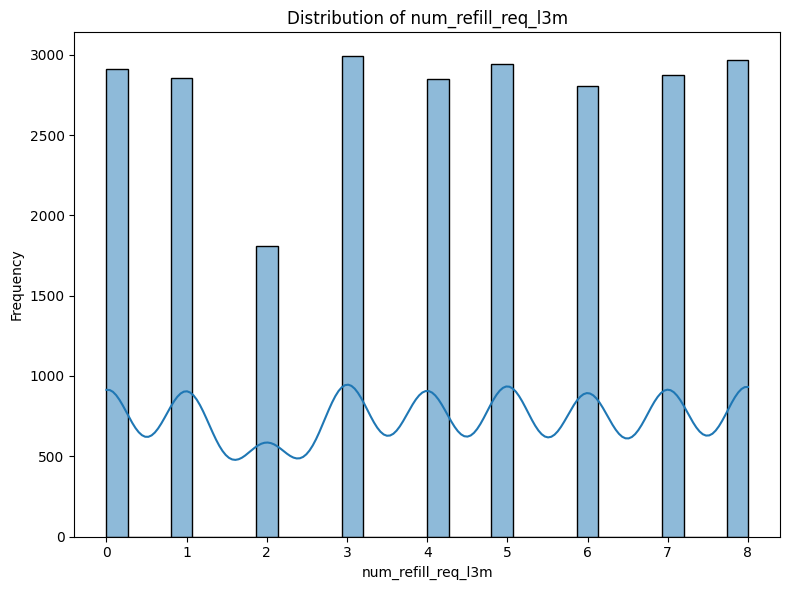

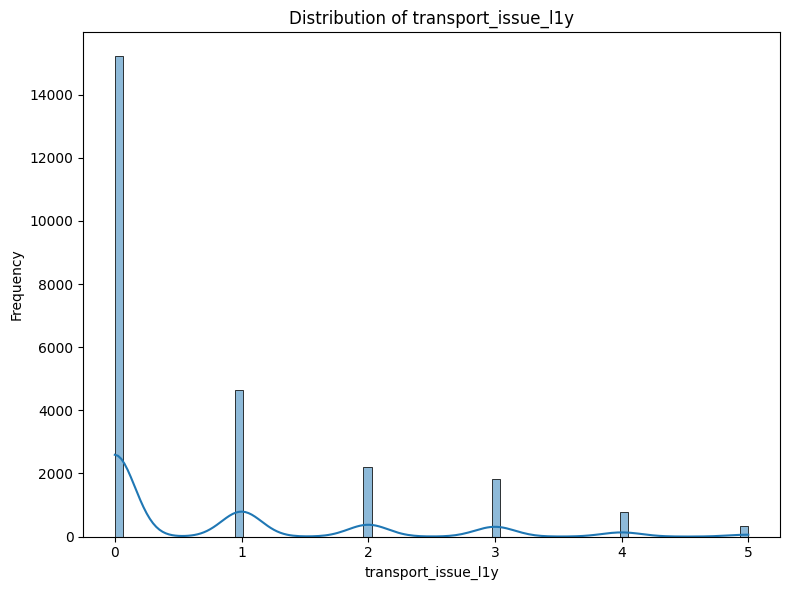

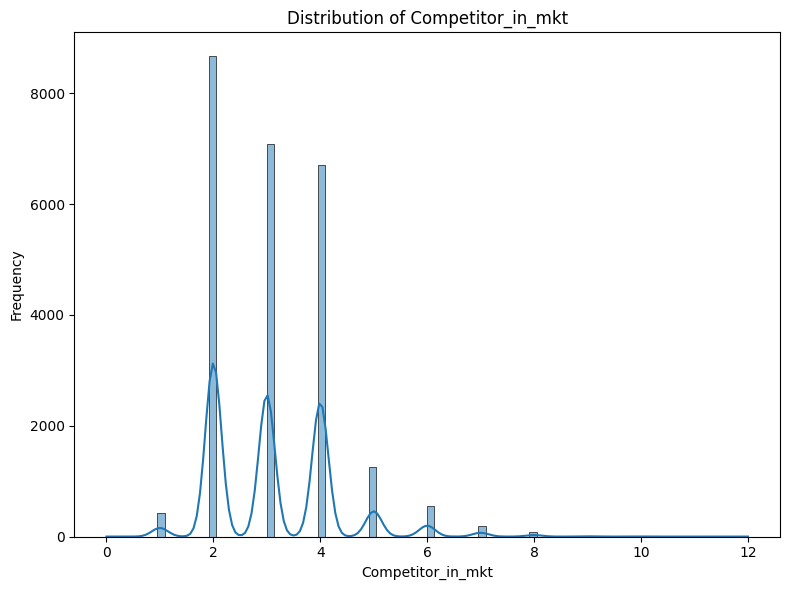

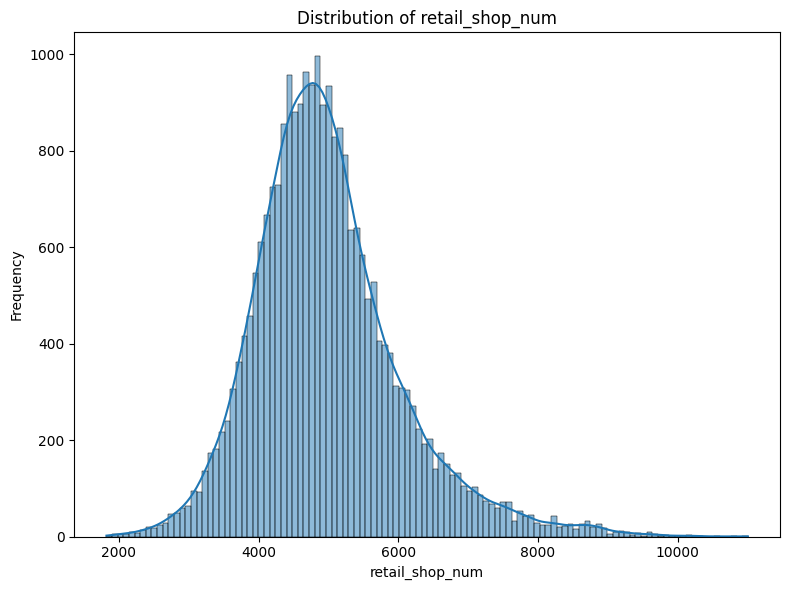

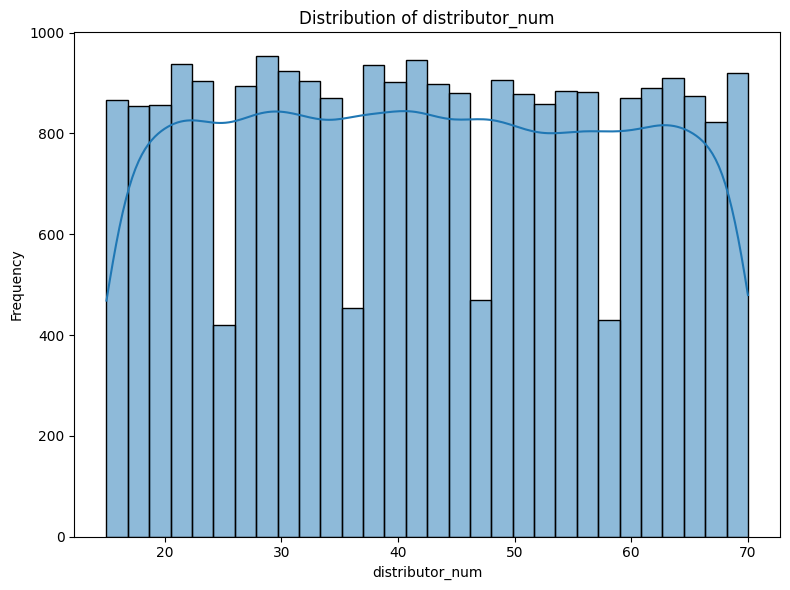

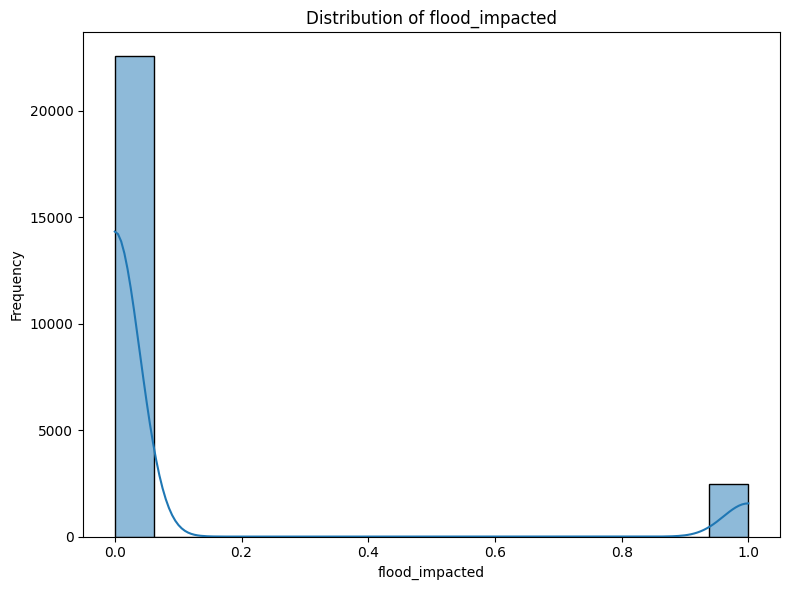

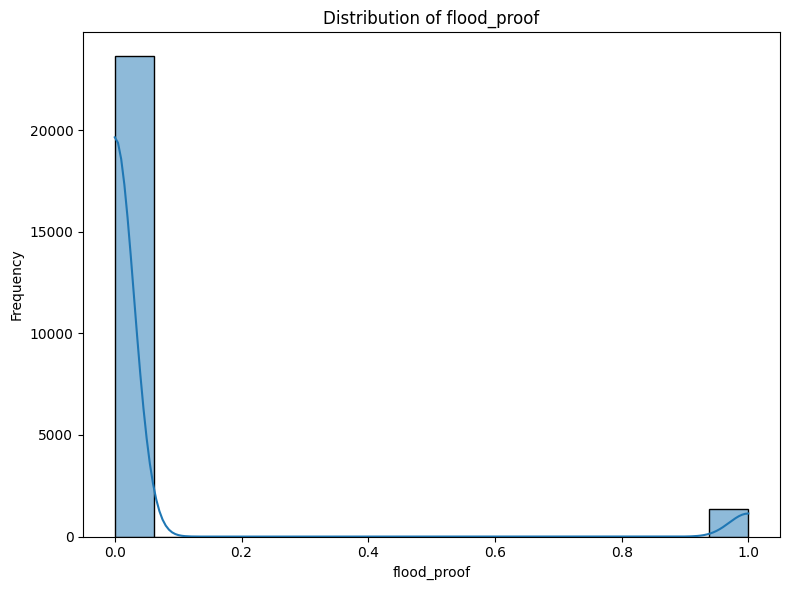

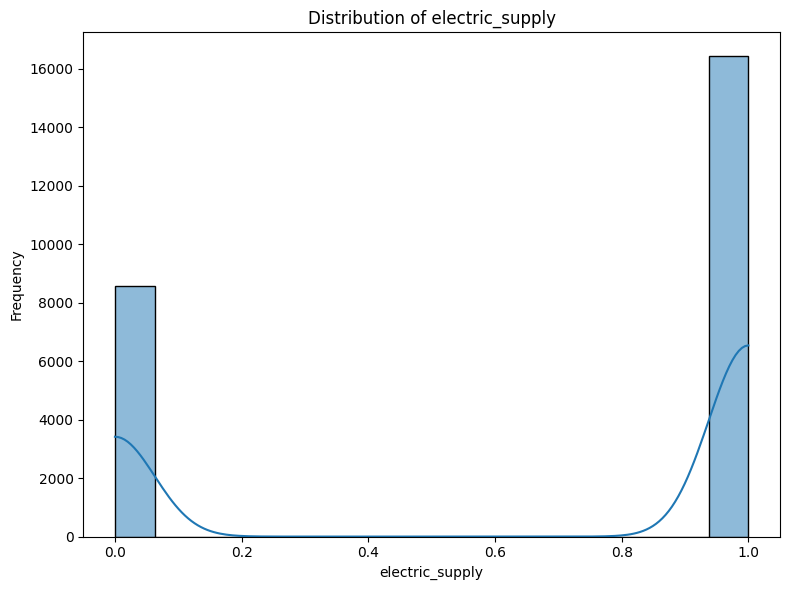

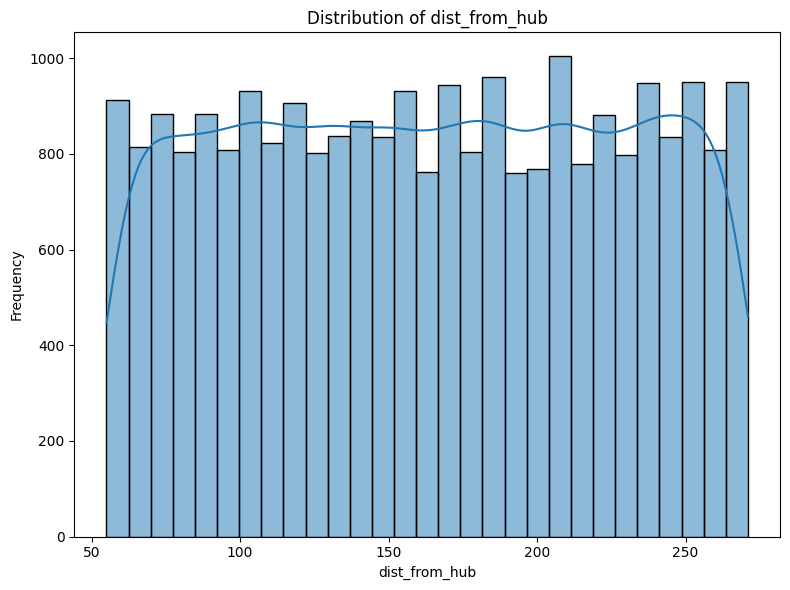

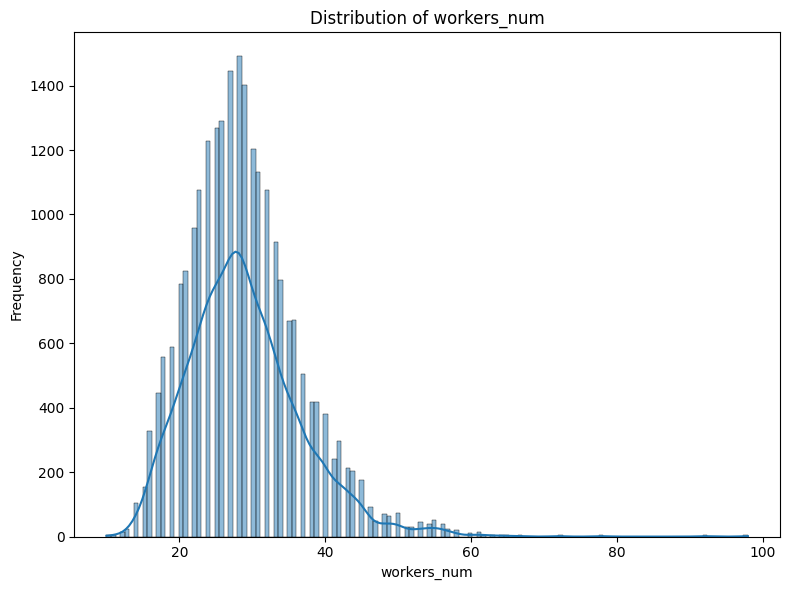

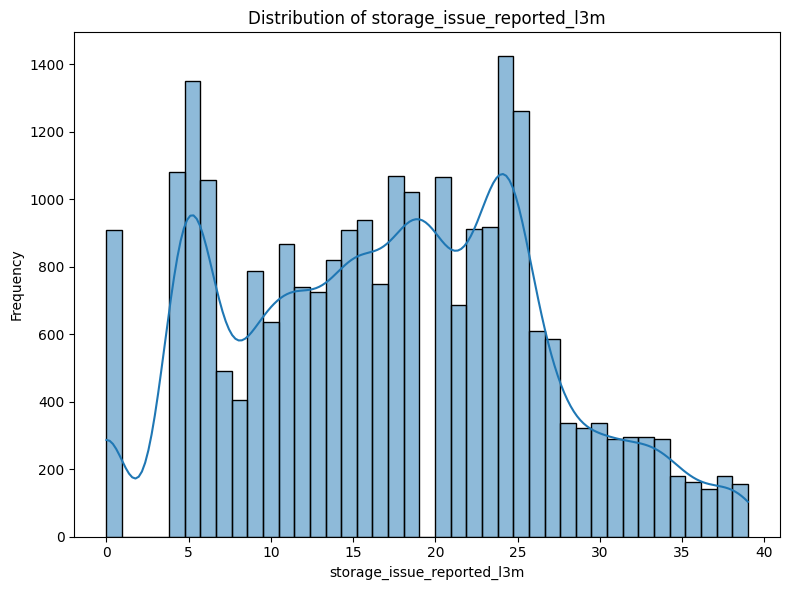

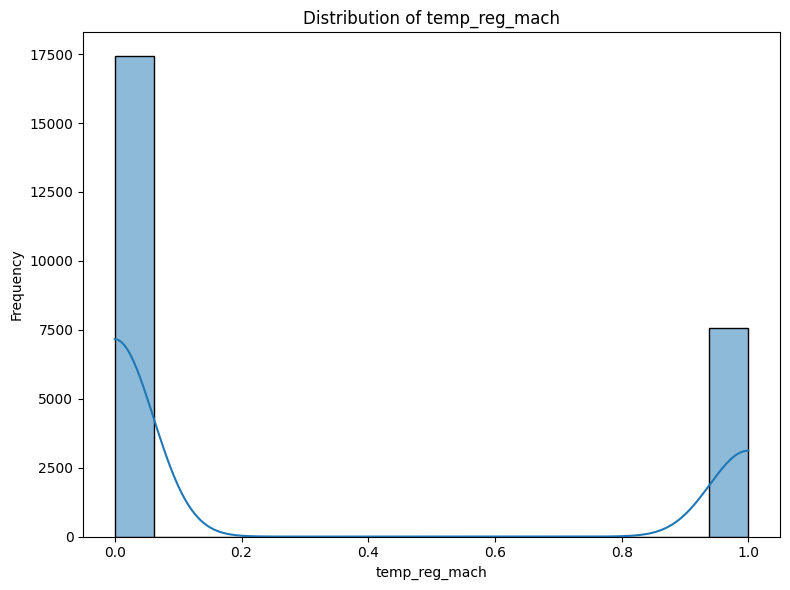

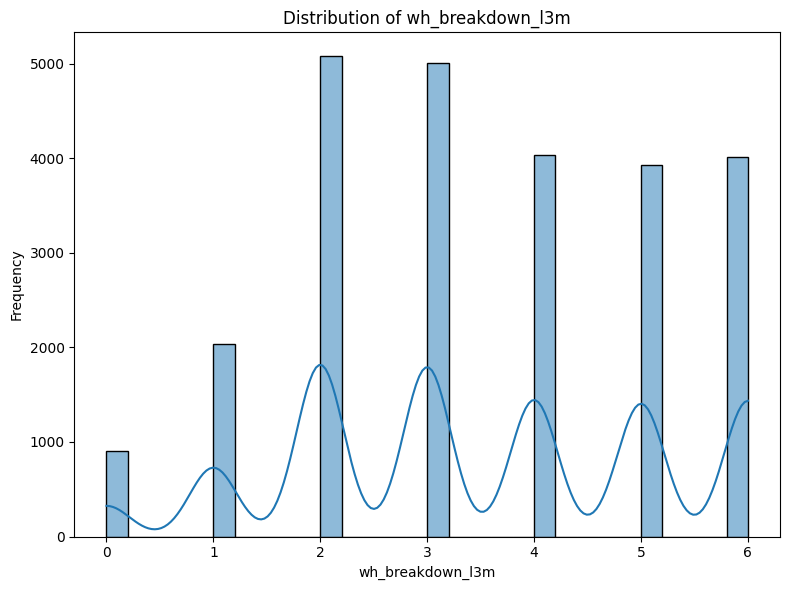

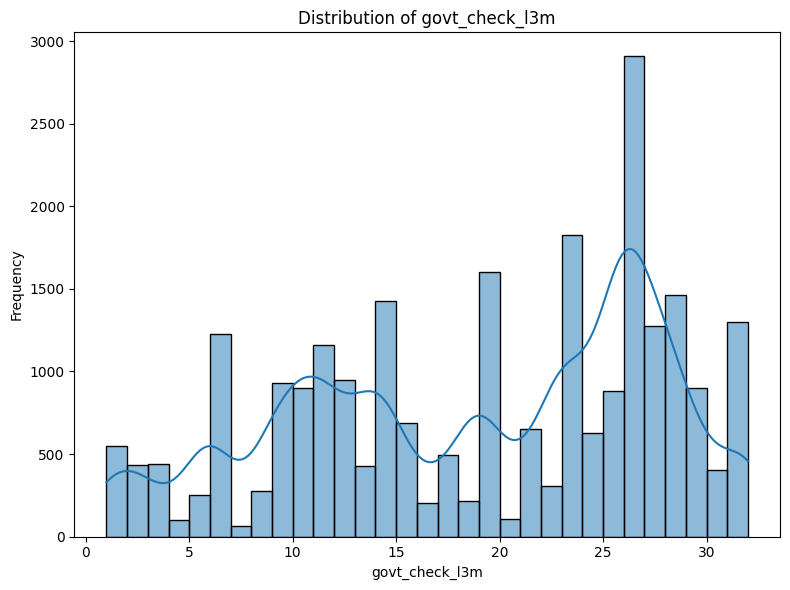

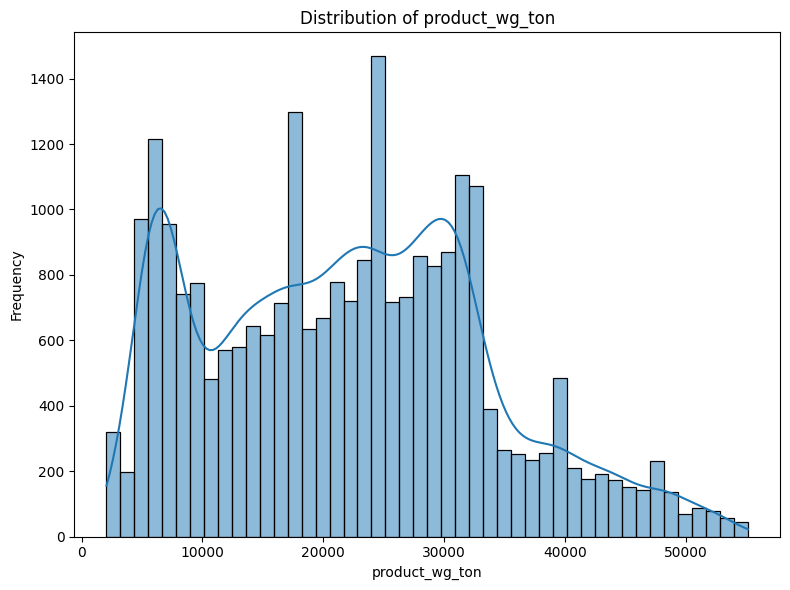

In [13]:
for column in num_var:
  plt.figure(figsize=(8, 6))
  sns.histplot(sup[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

For Categorical variables

In [13]:
cat_var = sup.select_dtypes(include = ['object']).columns

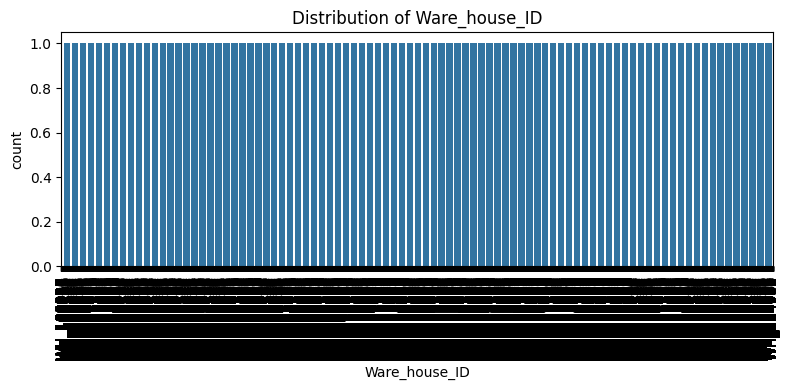

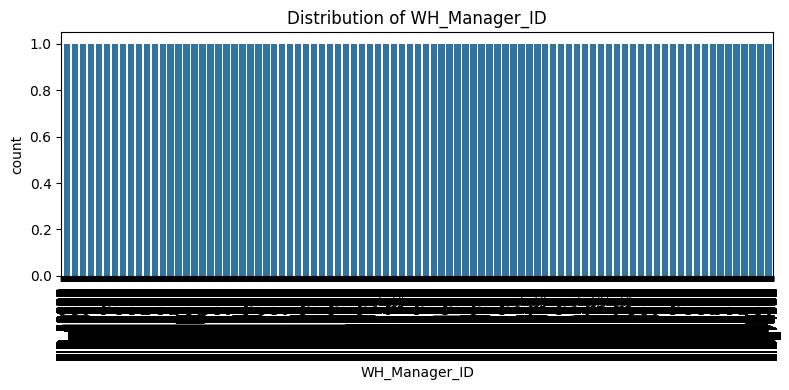

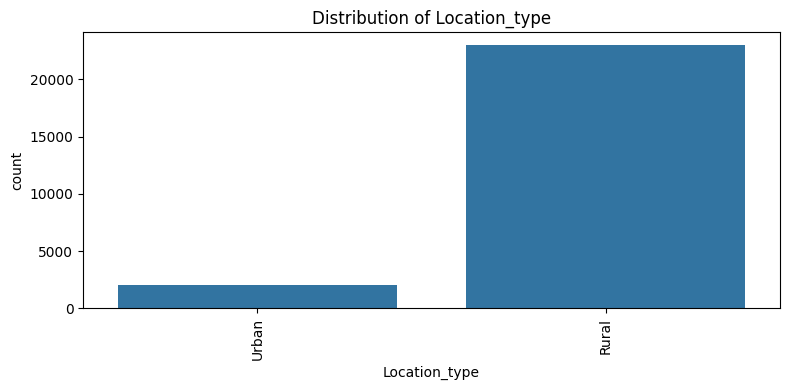

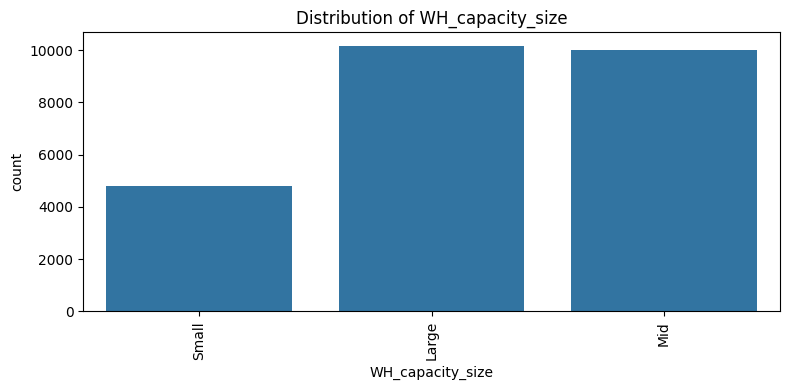

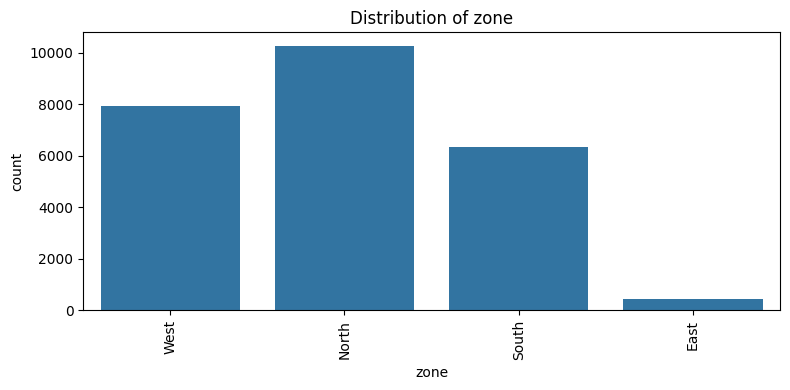

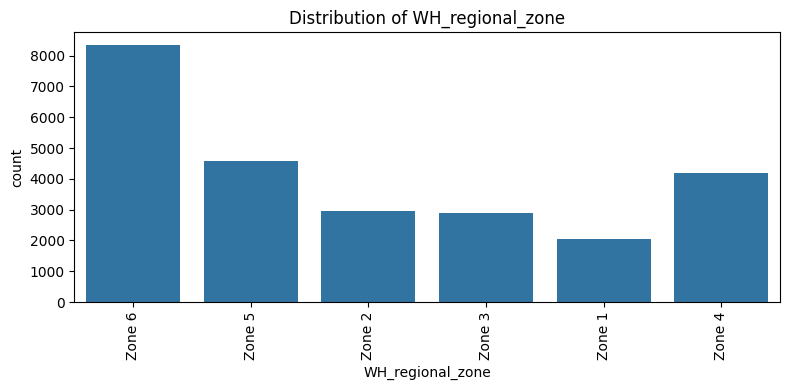

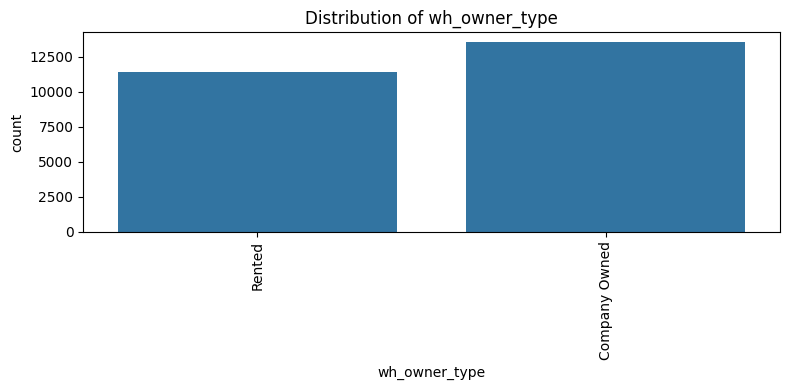

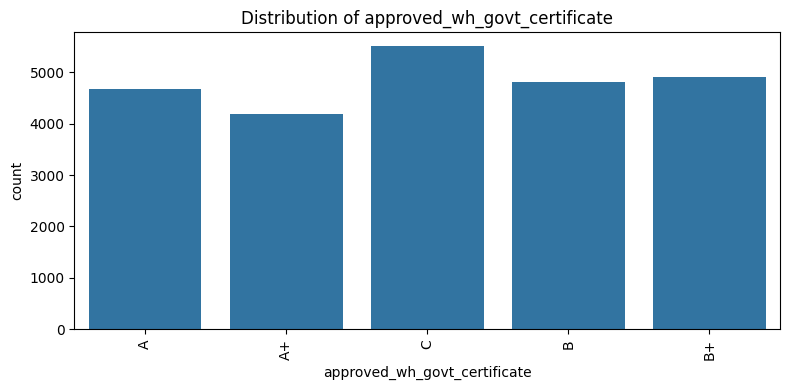

In [ ]:
for col in cat_var:
  plt.figure(figsize=(8,4))
  sns.countplot(data = sup, x = col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

Key Inferences -

* This dataset encompasses through 25000 records and 24 different features
* This dataset has 15 continuous variables & 8 categorical variables
* Out of all continuous variables 14 are int types & 1 is float type
* Out of all the categorical variables all 8 of them are object types
* Most of the warehouses are company owned, large sized, based in north zone, and rural areas
* Std. Dev. is high in 'retail_shop_num' & 'product_wg_ton', which means there's high variation in data or the data is highly spread-out in these variables
* There are 13779 missing records in this data
* There is a variable 'wh_est_year' which has more than 50% missing values, therefore, we'll drop it





#### Missing Value Treatment

For Numerical Variables

In [14]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

# Handle missing values for numerical variables
for col in num_var:
    if sup[col].isnull().sum() > 0:
        if has_outliers(sup[col]):
            # Replace with median if outliers are present
            sup[col].fillna(sup[col].median(), inplace=True)
        else:
            # Replace with mean if no outliers
            sup[col].fillna(sup[col].mean(), inplace=True)

Categorical Variables

In [15]:
for col in cat_var:
    if sup[col].isnull().sum() > 0:
        most_common_class = sup[col].mode()[0]
        if pd.isnull(most_common_class):
            # Replace with 'Unknown' if most common class is missing
            sup[col].fillna('Unknown', inplace=True)
        else:
            # Replace with the most common class
            sup[col].fillna(most_common_class, inplace=True)

In [16]:
# Verify that there are no more missing values
print(sup.isnull().sum().sum())

0


The missing values were treated succesfully.

#### Univariate Analysis

In [ ]:
cat_var.to_list()

['Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

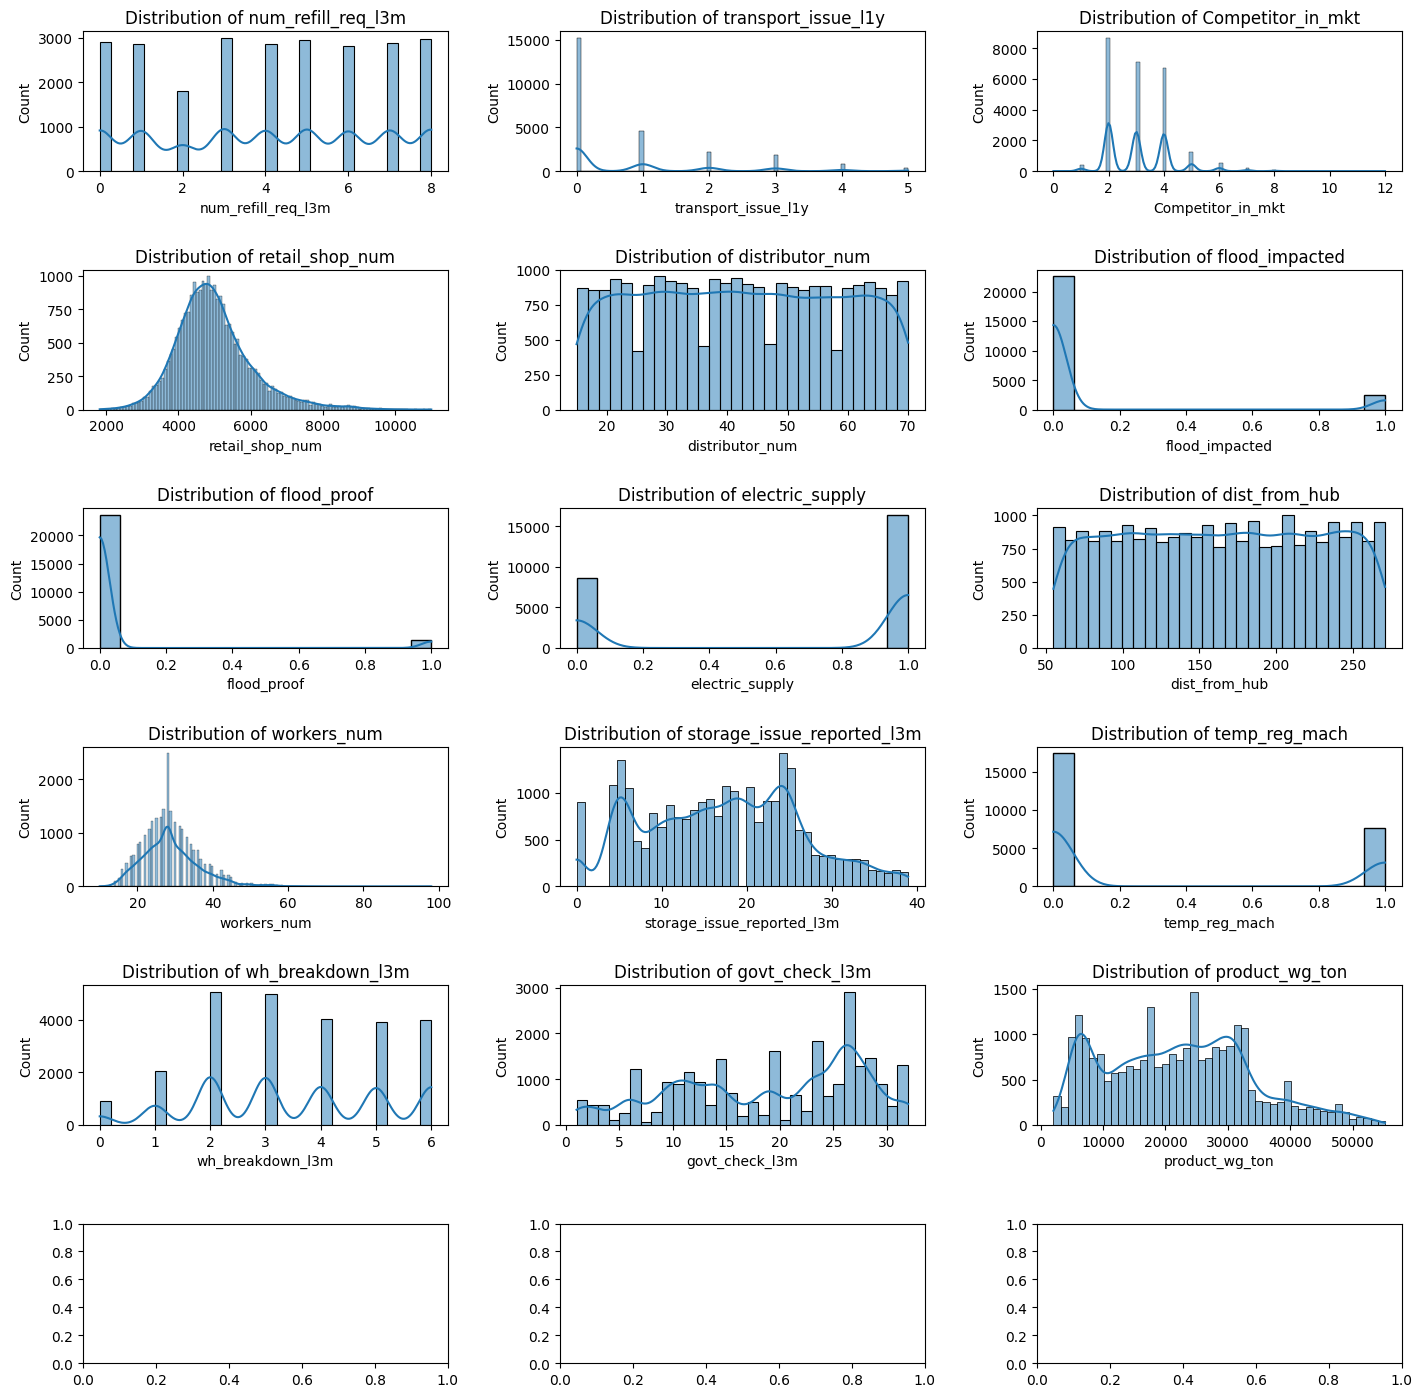

In [ ]:
# plotting histograms for numerical variables

fig, axes = plt.subplots(len(num_var)//3 + 1, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)
for idx, col in enumerate(num_var):
  sns.histplot(data=sup, x=col, kde=True, ax=axes[idx//3, idx%3])
  axes[idx//3, idx%3].set_title(f'Distribution of {col}')
plt.show()

Key Inferences -
* Product_wg_ton: Mean value is around 22,102 tons, with a large variation (std = 11,608 tons).
* dist_from_hub: Values range between 55 and 271, with a mean of 163.
* workers_num: A median of 28 workers per warehouse, but the values range widely, with some missing data.
* Location_Type: The majority of warehouses are in rural areas (22,957 out of 25,000).
* WH_capacity_size: Large warehouse make up about 40%, while mid and small capabilities are evenly distributed.

#### Bi-Variate Analysis

Correlation Heatmap for Numerical Variables

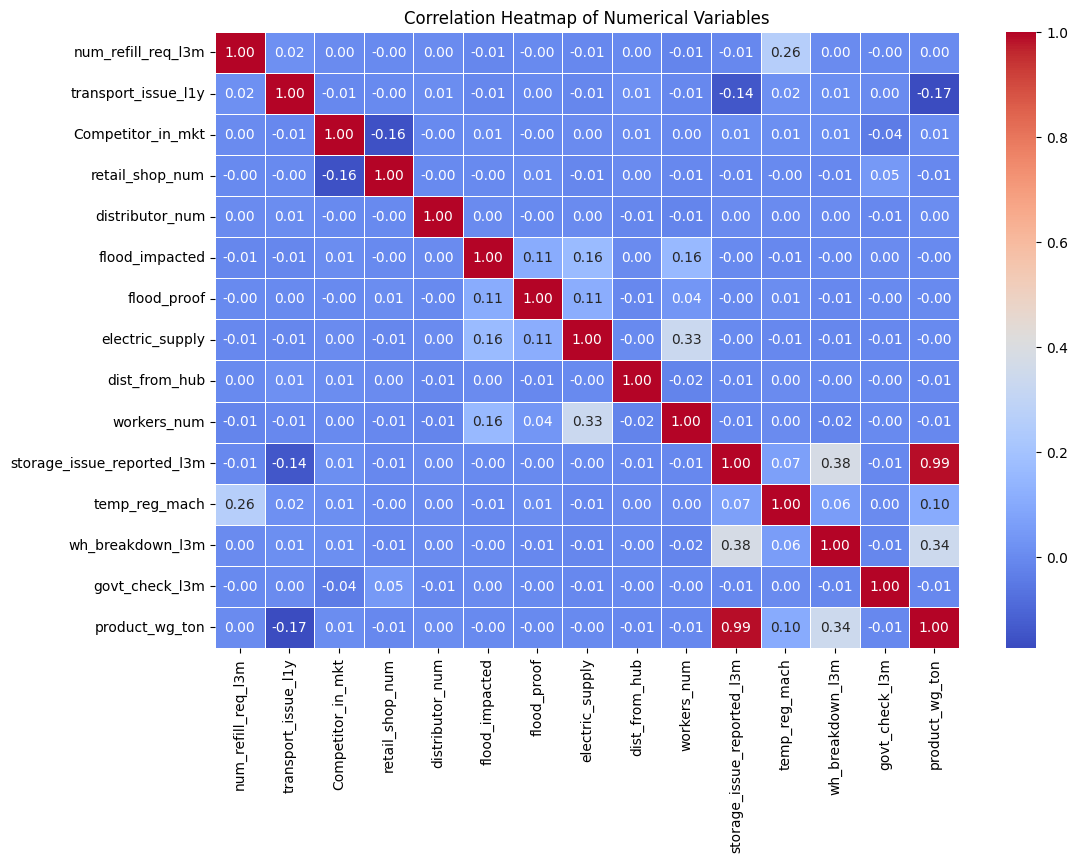

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = sup[num_var].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Key Points -
* Ther's strong positive correlation between storage_issue_reported_l3m & wh_breakdown_l3m, as well as govt_check_l3m
* Variables like dist_from_hub & product_wg_ton show moderate correlation with some of the operational variables.

Boxplots for Categorical Vs Numerical variables

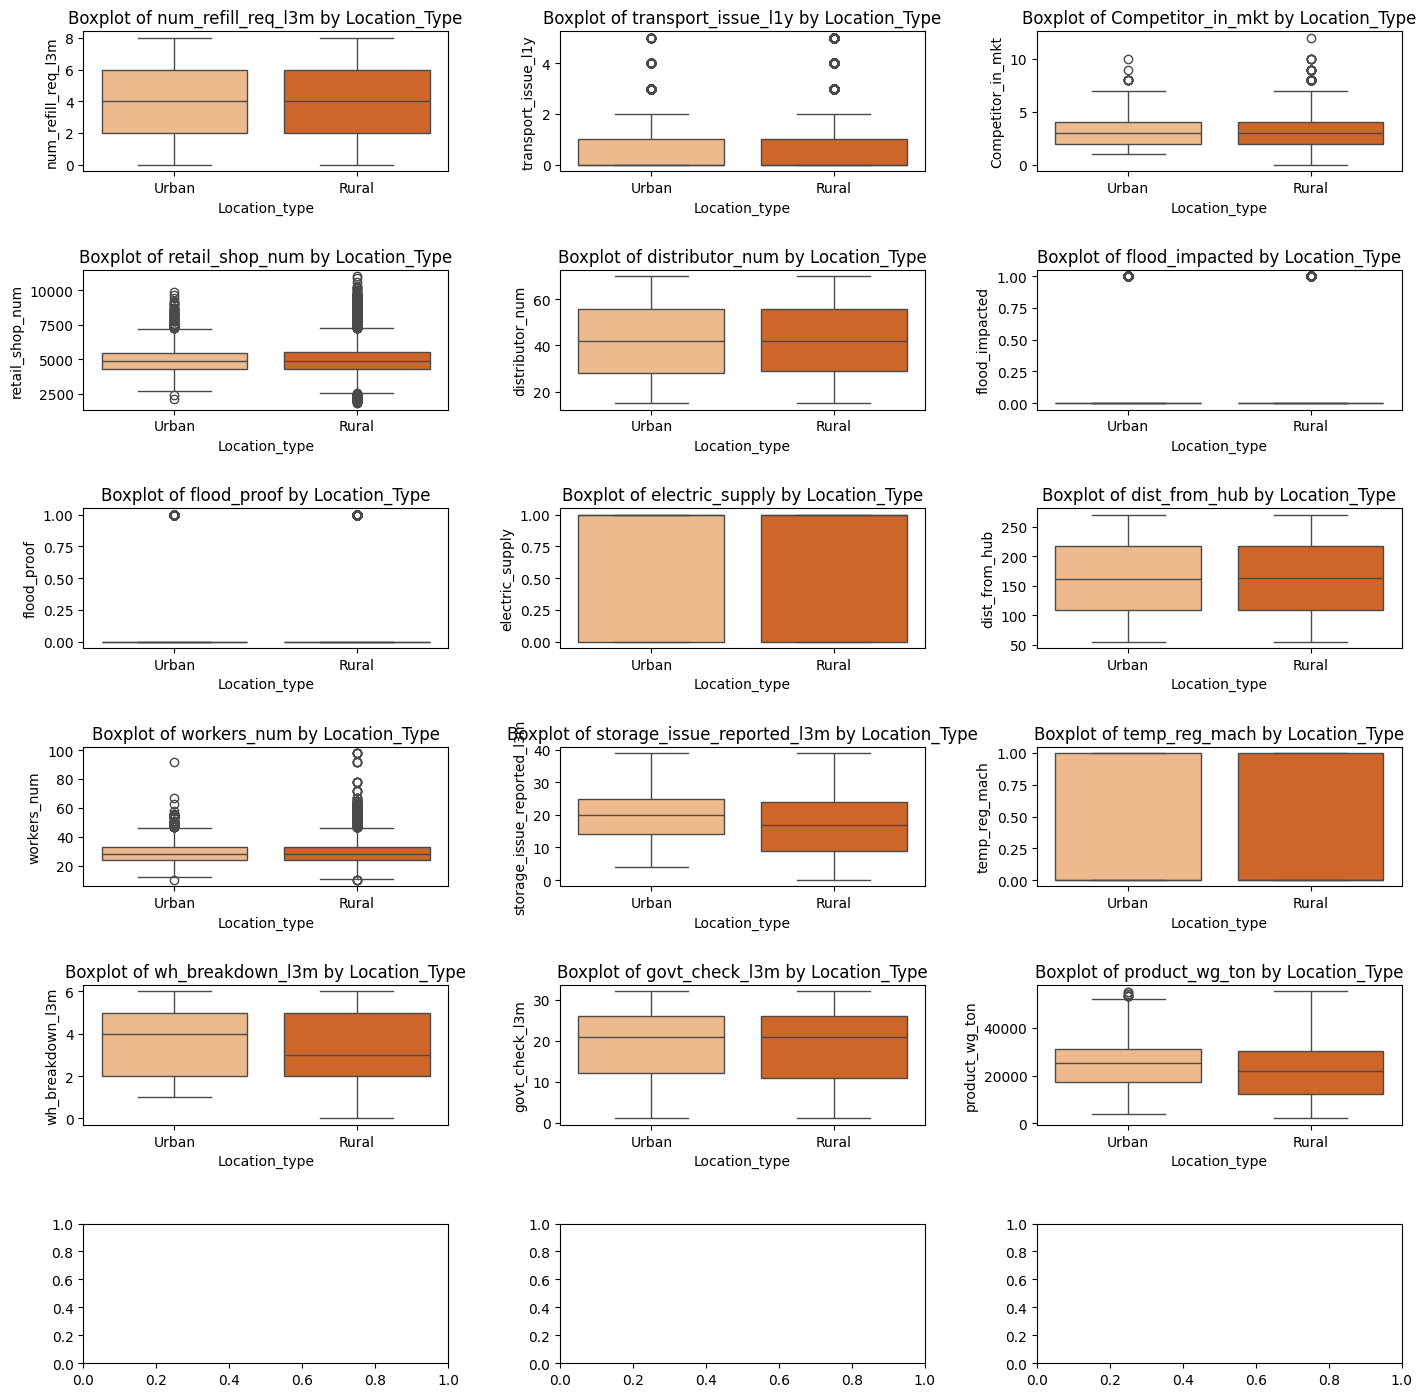

In [ ]:
fig, axes = plt.subplots(len(num_var)//3 + 1, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)
for idx, col in enumerate(num_var):
  sns.boxplot(data=sup, x='Location_type', y=col, ax=axes[idx//3, idx%3], palette="Oranges")
  axes[idx//3, idx%3].set_title(f'Boxplot of {col} by Location_Type')
plt.show()

Key Inferences -
* Urban warehouses tend to have fewer issues and higher electric supply consistently compared to rural ones.
* Distances from the hub are generally greater in rural locations, which is expected.

#### Multi-Variate Analysis

Pair Plot

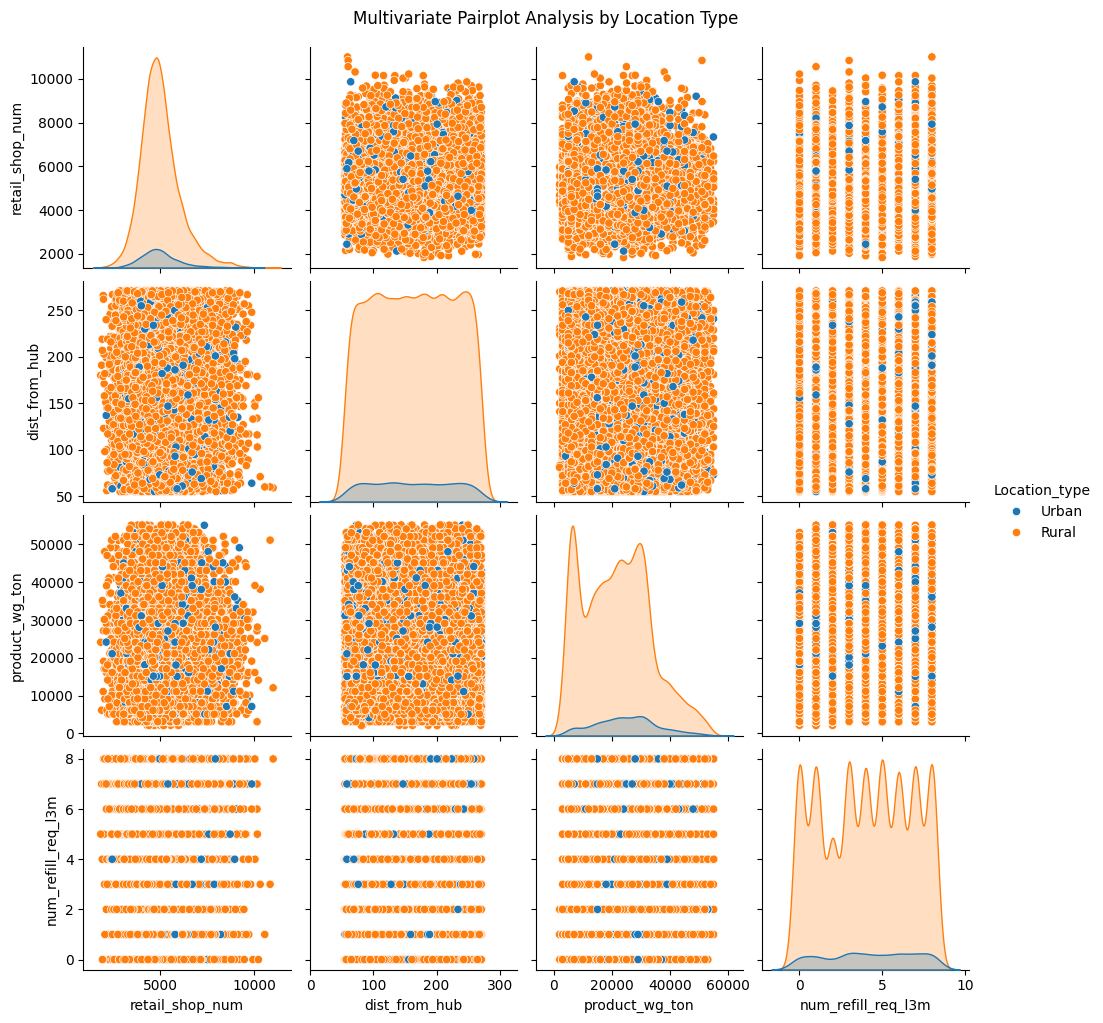

In [ ]:
sns.pairplot(sup, vars=['retail_shop_num', 'dist_from_hub', 'product_wg_ton', 'num_refill_req_l3m'], hue='Location_type')
plt.suptitle('Multivariate Pairplot Analysis by Location Type', y=1.02)
plt.show()

Multiple Linear Regression: To check how multiple independent variables affect dependent variables

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sup[['retail_shop_num', 'dist_from_hub', 'num_refill_req_l3m']]
y = sup['product_wg_ton']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5906
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.621
Time:                        06:54:51   Log-Likelihood:            -2.6946e+05
No. Observations:               25000   AIC:                         5.389e+05
Df Residuals:                   24996   BIC:                         5.390e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.259e+04    419

Key Points -
* Rural warehouses handle larger product volumes and serve more retail shops.

* These warehouses face more operational challenges, such as breakdowns and storage issues.

* Warehouses farther from central hubs experience higher refill demands.

* Operational inefficiencies lead to increased government checks.

* Optimizing operations in high-demand warehouses can reduce issues and improve efficiency.

#### **Label Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Encode categorical variables
categorical_columns = sup.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    sup[col] = le.fit_transform(sup[col])
    label_encoders[col] = le

**Dependent Variable: product_wg_ton**

#### Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Define features and target ('product_wg_ton' is the target variable)
X = sup.drop('product_wg_ton', axis=1)
y = sup['product_wg_ton']

In [21]:
# Split the data into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Build and Evaluate Models**

In [ ]:
#from sklearn.impute import SimpleImputer

In [ ]:
# Create an imputer to replace NaN with the mean
#imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
#X_train_imputed = imputer.fit_transform(X_train)
#X_test_imputed = imputer.transform(X_test)

Linear Regression

In [ ]:
# Fit Linear Regression model
log_model = LinearRegression()
log_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = log_model.predict(X_test)
print("R^2 Score: ", r2_score(y_test, y_pred))

R^2 Score:  0.976720097271012


Ridge

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
print("R^2 Score: ", r2_score(y_test, y_pred_ridge))

R^2 Score:  0.9767201556046599


Random Forest

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("R^2 Score: ", r2_score(y_test, y_pred_rf))

R^2 Score:  0.9933672276238554


#### Test for Multicollinearity using VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data[vif_data['VIF'] > 5])  # Variables with VIF > 5 should be considered for removal

                       feature        VIF
0                Ware_house_ID        inf
1                WH_Manager_ID        inf
4                         zone   5.530596
5             WH_regional_zone   5.992415
8            Competitor_in_mkt   8.080231
9              retail_shop_num  18.507858
11             distributor_num   7.455750
15               dist_from_hub   7.282163
16                 workers_num  15.075149
17  storage_issue_reported_l3m   5.385135
20            wh_breakdown_l3m   6.060972
21              govt_check_l3m   5.774961


It seems that, there's high multicollinearity between all the variables. Therefore, it's difficult to conclude which variables are independent of each other.

#### **Multicollinearity**

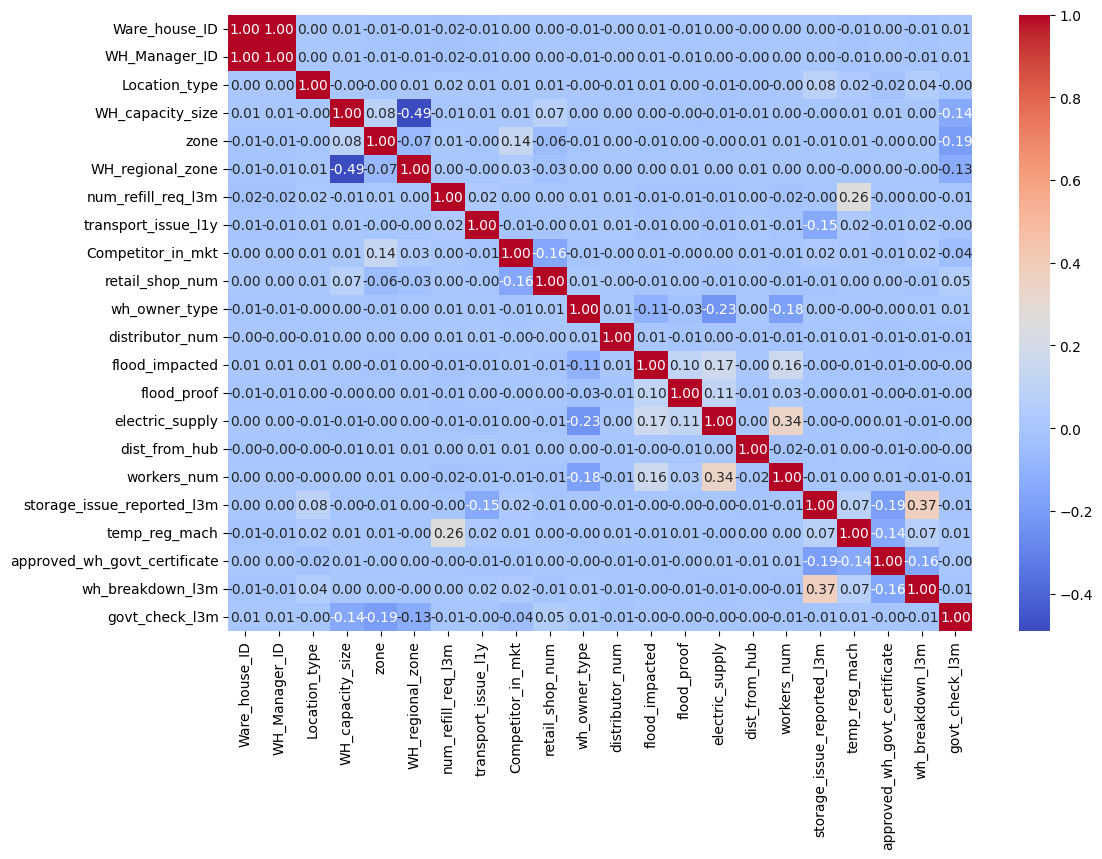

In [24]:
# Generate correlation matrix
corr_matrix = X_train.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Observations from the Correlation Matrix:

1. **High Correlation Between Some Variables:** Variables like WH_capacity_size and zone have a correlation of around 0.49, which is moderate but may need attention.
Strong correlation is seen between flood_proof and electric_supply (0.34), and between wh_breakdown_l3m and storage_issue_reported_l3m (0.37), though these are not critically high.
Warehouse ID (Ware_house_ID) and WH_Manager_ID have a perfect correlation (1.0), indicating they likely represent the same or redundant information. One of them should definitely be removed.


2. **Not Extremely High Correlations:** Most correlations are below 0.5, which suggests multicollinearity might not solely be driven by linear relationships visible in the correlation matrix but possibly due to nonlinear or complex interactions. However, some moderate correlations might still be contributing to inflated VIF scores.

Dropping variables based on correlations

In [23]:
# Drop the selected columns from X_train and X_test
columns_to_remove = ['Ware_house_ID', 'WH_Manager_ID', 'zone', 'flood_proof', 'wh_breakdown_l3m']

X_train_reduced = X_train.drop(columns=columns_to_remove)
X_test_reduced = X_test.drop(columns=columns_to_remove)

# Print out the reduced set of features
print("Remaining Features after Correlation-based Removal:")
print(X_train_reduced.columns)

Remaining Features after Correlation-based Removal:
Index(['Location_type', 'WH_capacity_size', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'govt_check_l3m'],
      dtype='object')


Rechecking VIF again

In [24]:
# Recalculate VIF for the remaining features
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_train_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]

print(vif_data_reduced)

                         feature        VIF
0                  Location_type   1.098354
1               WH_capacity_size   2.778325
2               WH_regional_zone   5.958314
3             num_refill_req_l3m   3.639466
4            transport_issue_l1y   1.437964
5              Competitor_in_mkt   7.611583
6                retail_shop_num  17.918842
7                  wh_owner_type   1.929833
8                distributor_num   7.384707
9                 flood_impacted   1.164367
10               electric_supply   3.451414
11                 dist_from_hub   7.205921
12                   workers_num  14.747601
13    storage_issue_reported_l3m   4.538787
14                 temp_reg_mach   1.575888
15  approved_wh_govt_certificate   3.277193
16                govt_check_l3m   5.657908


Still some of the features have high VIF values that needs to be removed.

In [25]:
# Remove the variables with the highest VIF
columns_to_remove_high_vif = ['retail_shop_num', 'workers_num']

X_train_reduced_vif = X_train_reduced.drop(columns=columns_to_remove_high_vif)
X_test_reduced_vif = X_test_reduced.drop(columns=columns_to_remove_high_vif)

# Recalculate VIF for the remaining features
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_train_reduced_vif.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced_vif.values, i) for i in range(X_train_reduced_vif.shape[1])]

print(vif_data_reduced)

                         feature       VIF
0                  Location_type  1.098090
1               WH_capacity_size  2.493728
2               WH_regional_zone  5.311509
3             num_refill_req_l3m  3.585640
4            transport_issue_l1y  1.430346
5              Competitor_in_mkt  7.395259
6                  wh_owner_type  1.906866
7                distributor_num  6.972223
8                 flood_impacted  1.150810
9                electric_supply  3.008227
10                 dist_from_hub  6.832238
11    storage_issue_reported_l3m  4.359348
12                 temp_reg_mach  1.574527
13  approved_wh_govt_certificate  3.175521
14                govt_check_l3m  5.037890


Repeating the earlier steps.

In [26]:
# Remove 'Competitor_in_mkt' and 'distributor_num' due to high VIF
columns_to_remove_high_vif_2 = ['Competitor_in_mkt', 'distributor_num']

X_train_reduced_vif_2 = X_train_reduced_vif.drop(columns=columns_to_remove_high_vif_2)
X_test_reduced_vif_2 = X_test_reduced_vif.drop(columns=columns_to_remove_high_vif_2)

# Recalculate VIF for the remaining features
vif_data_reduced_2 = pd.DataFrame()
vif_data_reduced_2['feature'] = X_train_reduced_vif_2.columns
vif_data_reduced_2['VIF'] = [variance_inflation_factor(X_train_reduced_vif_2.values, i) for i in range(X_train_reduced_vif_2.shape[1])]

print(vif_data_reduced_2)

                         feature       VIF
0                  Location_type  1.097961
1               WH_capacity_size  2.308796
2               WH_regional_zone  4.726738
3             num_refill_req_l3m  3.529734
4            transport_issue_l1y  1.421853
5                  wh_owner_type  1.888063
6                 flood_impacted  1.149790
7                electric_supply  2.956461
8                  dist_from_hub  6.483168
9     storage_issue_reported_l3m  4.180573
10                 temp_reg_mach  1.572810
11  approved_wh_govt_certificate  3.102705
12                govt_check_l3m  4.726586


Now, it looks much better than earlier.

#### **Rebuilding Models**

1. Linear Regression Model:

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

1. Linear Regression

In [ ]:
# Fit Linear Regression model
log_model_2 = LinearRegression()
log_model_2.fit(X_train_reduced_vif_2, y_train)

# Make predictions and evaluate
y_pred_2 = log_model_2.predict(X_test_reduced_vif_2)
# Instead of accuracy_score, use regression metrics like R-squared, MSE, or RMSE
from sklearn.metrics import r2_score, mean_squared_error
print("R²: ", r2_score(y_test, y_pred_2))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_2))
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred_2, squared=False))

R²:  0.9756093877427612
Mean Squared Error:  3298150.2300856337
Root Mean Squared Error:  1816.0810086793028


2. Ridge Regression:

In [ ]:
# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train_reduced_vif_2, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_reduced_vif_2)

# Evaluate model performance (R² and RMSE)
r_squared = ridge_model.score(X_test_reduced_vif_2, y_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f"R²: {r_squared}")
print(f"RMSE: {rmse_ridge}")

R²: 0.9756094340872021
RMSE: 1816.079283316728


An R2 value close to 1 suggests a very good fit, meaning your model is doing well in terms of explaining the variability of the data.

3. Lasso Regression:

In [ ]:
# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train_reduced_vif_2, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_reduced_vif_2)

# Evaluate model performance (R² and RMSE)
r_squared_lasso = lasso_model.score(X_test_reduced_vif_2, y_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"Lasso R²: {r_squared_lasso}")
print(f"Lasso RMSE: {rmse_lasso}")

Lasso R²: 0.9756094481067156
Lasso RMSE: 1816.0787613823127


4. Elastic Net:

In [ ]:
# Initialize Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model
elastic_net_model.fit(X_train_reduced_vif_2, y_train)

# Make predictions
y_pred_elastic = elastic_net_model.predict(X_test_reduced_vif_2)

# Evaluate model performance
r_squared_elastic = elastic_net_model.score(X_test_reduced_vif_2, y_test)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
print(f"Elastic Net R²: {r_squared_elastic}")
print(f"Elastic Net RMSE: {rmse_elastic}")

Elastic Net R²: 0.9755916382540376
Elastic Net RMSE: 1816.741685967126


5. Random Forest:

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_reduced_vif_2, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_reduced_vif_2)

# Evaluate model performance
r_squared_rf = rf_model.score(X_test_reduced_vif_2, y_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest R²: {r_squared_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest R²: 0.9930348511168436
Random Forest RMSE: 970.4855376761171


This indicates that approximately 99.30% of the variance in the target variable can be explained by the features in your model. This is an excellent result, suggesting a very good fit and that the model is capturing almost all of the variability in the data.

Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

1. Hyperparameter tuning for Linear Regression

For Linear Regression, there's no regularization like in Ridge, Lasso, or Elastic Net, so there aren't any hyperparameters to tune directly. However, you can apply some techniques like:

1. Polynomial Features
2. Feature Interaction
3. Feature Selection

Polynomial Features with GridSearchCV for Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
# Define a pipeline that adds Polynomial Features and applies Linear Regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),  # Polynomial features transformation
    ('linear_regression', LinearRegression())  # Linear Regression
])

# Define the parameter grid to search the best degree of the polynomial
param_grid = {
    'poly_features__degree': [1, 2, 3, 4]  # Trying different degrees for the polynomial
}

# Initialize GridSearchCV for Polynomial Features with Linear Regression
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best degree for Polynomial Features: {grid_search.best_params_['poly_features__degree']}")
print(f"Best R² for Linear Regression with Polynomial Features: {grid_search.best_score_}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_poly = best_model.predict(X_test)

# Evaluate performance
print(f"Test R² for Linear Regression with Polynomial Features: {best_model.score(X_test, y_test)}")

In [ ]:
# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearch
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_rf.fit(X_train_reduced_vif_2, y_train)

# Best parameters
print(f"Best parameters: {grid_rf.best_params_}")

# Evaluate the best model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_reduced_vif_2)
print(f"Best Random Forest R²: {best_rf.score(X_test_reduced_vif_2, y_test)}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest R²: 0.9937129342396549


Best Feature for random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
# Define feature matrix X and target variable y from your dataframe 'sup'
X = sup.drop(columns=['product_wg_ton'])  # Replace 'target_column' with the actual name of your target variable
y = sup['product_wg_ton']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract and visualize feature importances as shown before
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features and plot
print("Top 10 Important Features:\n", feature_importance_df.head(10))

Top 10 Important Features:
                          Feature  Importance
17    storage_issue_reported_l3m    0.982747
19  approved_wh_govt_certificate    0.009068
7            transport_issue_l1y    0.001099
18                 temp_reg_mach    0.000811
9                retail_shop_num    0.000754
15                 dist_from_hub    0.000741
11               distributor_num    0.000695
16                   workers_num    0.000620
6             num_refill_req_l3m    0.000572
21                govt_check_l3m    0.000556


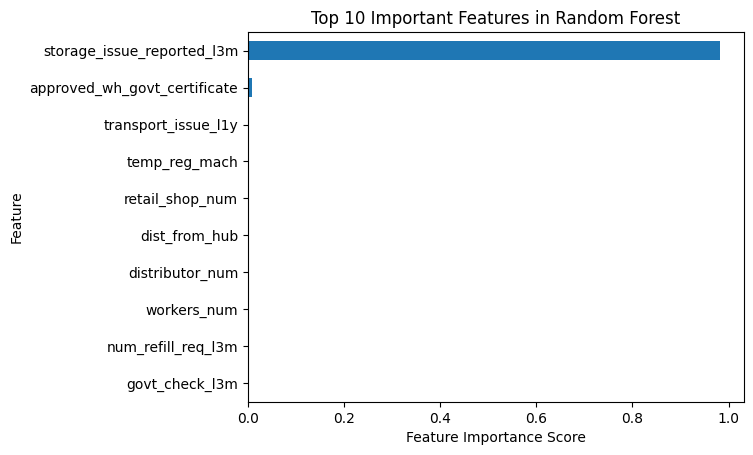

In [30]:
feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Important Features in Random Forest")
plt.gca().invert_yaxis()
plt.show()